In [73]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [74]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#PassengerId 열을 인덱스로 지정/
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')
# train.head()
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [75]:
# 이름과 호칭 정리

# 호칭을 뽑기 위한 정규식
pat = re.compile('[\w]+, ([\w]+)')
# 이름에서 호칭을 뽑기위한 함수 정의
def find_name_title(x):
    return pat.findall(x)[0]

#이름 내용을 호칭으로 변경해버리기
train['Name'] = train['Name'].apply(find_name_title)
test['Name'] = test['Name'].apply(find_name_title)

In [76]:
train['Cabin_yes'] = np.where(train['Cabin'].isnull()==False,1,0)
test['Cabin_yes'] = np.where(test['Cabin'].isnull()==False,1,0)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes
PassengerId,,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [77]:
#cabin 정리
train['Cabin_yes'] = np.where(train['Cabin'].isnull()==False,1,0)
test['Cabin_yes'] = np.where(test['Cabin'].isnull()==False,1,0)

pat_cabin = re.compile('([\w])[0-9]*')

#cabin의 앞문자를 뽑아내서 정리
def Cabin_word(x):
    if x is not np.nan and x is not None:
        return pat_cabin.findall(x)[0]
    else: return 'X'

train['Cabin_C'] = train['Cabin'].apply(Cabin_word)
test['Cabin_C'] = test['Cabin'].apply(Cabin_word)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes,Cabin_C
PassengerId,,,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,X
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,X
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,C
5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,X
888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,B
889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,X


In [78]:
#one hot encoding(나이 데이터 채울려고 카테고리형 문자열 데이터를 encoding)

train_dummy = pd.get_dummies(data=train,columns=['Name','Sex','Embarked','Cabin_C']).drop(['Ticket','Cabin'], axis=1)
test_dummy = pd.get_dummies(data=test,columns=['Name','Sex','Embarked','Cabin_C']).drop(['Ticket','Cabin'], axis=1)

test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes,Cabin_C
PassengerId,,,,,,,,,,,,
892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q,0,X
893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S,0,X
894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q,0,X
895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S,0,X
896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,X
1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C,1,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,X


In [79]:
#KNN Regressor로 나이 채워놓기

knn = KNeighborsRegressor()
# 나이가 있는 데이터로 fit해서 모델을 생성
knn.fit(train_dummy[train_dummy['Age'].isnull()==False][train_dummy.columns.drop('Age')],
       train_dummy[train_dummy['Age'].isnull()==False]['Age'])
# 나이가 결측인 데이터를 예측
guesses = knn.predict(train_dummy[train_dummy['Age'].isnull()==True][train_dummy.columns.drop('Age')])
guesses

array([47.8  , 27.8  , 18.4  , 32.5  , 17.6  , 25.2  , 21.584, 17.6  ,
       25.9  , 28.4  , 29.6  , 33.2  , 17.6  , 29.2  , 49.4  , 39.2  ,
       11.734, 25.2  , 29.6  , 17.6  , 29.6  , 29.6  , 25.2  , 30.2  ,
       19.8  , 29.6  , 47.8  , 17.6  , 20.4  , 27.1  , 26.2  , 37.   ,
       35.8  , 48.8  , 22.4  , 37.   , 28.4  , 46.8  , 28.8  , 47.8  ,
       17.6  , 35.2  , 47.8  , 25.2  , 12.6  , 26.6  , 17.1  , 19.3  ,
       36.4  , 46.4  , 47.8  , 21.5  , 40.9  , 17.6  , 33.4  , 54.6  ,
       39.2  , 48.   , 17.6  , 31.4  , 27.9  , 29.6  , 31.8  , 35.2  ,
       20.8  , 37.6  , 25.2  , 36.2  , 50.4  , 32.5  , 17.6  , 17.6  ,
       33.2  , 18.4  , 17.6  , 36.4  , 25.2  , 29.9  , 12.6  , 25.2  ,
       27.5  , 33.4  , 25.4  , 28.4  , 36.4  , 47.8  , 36.2  , 28.4  ,
       26.   , 29.6  , 40.6  , 47.8  , 29.6  , 33.4  , 29.9  , 36.4  ,
       42.2  , 33.4  , 12.6  , 26.   , 28.4  , 30.3  , 21.5  , 52.2  ,
       29.6  , 31.4  , 32.5  , 26.8  , 30.8  , 26.8  , 28.2  , 41.   ,
      

In [80]:
#예측값 대입하기

train_dummy.loc[train_dummy['Age'].isnull()==True,'Age'] = guesses
train_dummy.isnull().sum()


Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_yes        0
Name_Capt        0
Name_Col         0
Name_Don         0
Name_Dr          0
Name_Jonkheer    0
Name_Lady        0
Name_Major       0
Name_Master      0
Name_Miss        0
Name_Mlle        0
Name_Mme         0
Name_Mr          0
Name_Mrs         0
Name_Ms          0
Name_Rev         0
Name_Sir         0
Name_the         0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_C_A        0
Cabin_C_B        0
Cabin_C_C        0
Cabin_C_D        0
Cabin_C_E        0
Cabin_C_F        0
Cabin_C_G        0
Cabin_C_T        0
Cabin_C_X        0
dtype: int64

In [81]:
train_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_yes,Name_Capt,Name_Col,Name_Don,...,Embarked_S,Cabin_C_A,Cabin_C_B,Cabin_C_C,Cabin_C_D,Cabin_C_E,Cabin_C_F,Cabin_C_G,Cabin_C_T,Cabin_C_X
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
889,0,3,13.2,1,2,23.4500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


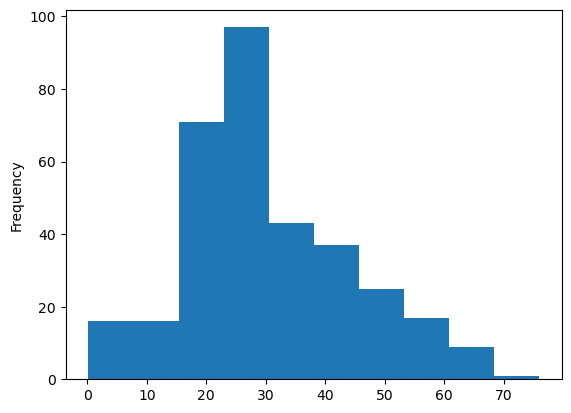

In [82]:
test_dummy['Age'].plot(kind='hist', bins=10)
train_dummy['Age_cat'] = pd.cut(train_dummy['Age'],10, labels=[*range(10)])
test_dummy['Age_cat'] = pd.cut(test_dummy['Age'],10, labels=[*range(10)])

<AxesSubplot:ylabel='Frequency'>

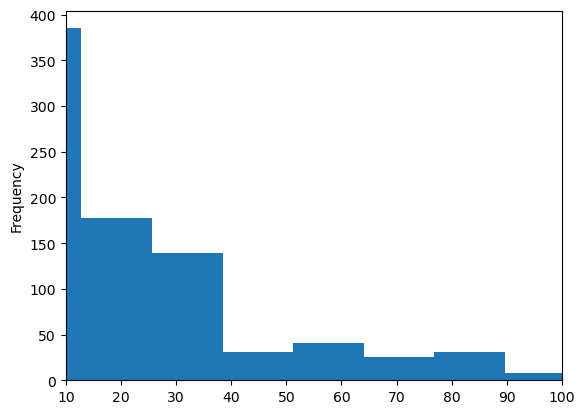

In [83]:
train_dummy['Fare'].plot(kind='hist', bins=40, xlim=(10,100))

In [84]:
# train_dummy['Fare_cat'] = pd.cut(train_dummy.Fare,precision=5,bins=[0,10,30,80,120,999999] ,labels=['lowlow','low','mid','high','highhigh'])
# test_dummy['Fare_cat'] = pd.cut(test_dummy.Fare,precision=5,bins=[0,10,30,80,120,999999] ,labels=['lowlow','low','mid','high','highhigh'])


train_dummy['Fare_cat'] = pd.qcut(train_dummy.Fare,5, labels=[*range(5)])
test_dummy['Fare_cat'] = pd.qcut(test_dummy.Fare,5, labels=[*range(5)])

In [85]:
train_dummy['Fare_cat'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_cat, dtype: int64

In [86]:
# 카테고리 화한 연속형 변수들에 대해서 다시 One hot encoding
train_final = pd.get_dummies(train_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')
test_final = pd.get_dummies(test_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')
train_final

,Survived,SibSp,Parch,Cabin_yes,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,...,Age_cat_8,Age_cat_9,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3,Fare_cat_4,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
888,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
889,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [87]:
X_train, X_test, y_train, y_test = train_test_split(train_final.iloc[:,1:], train_final['Survived'], test_size=0.2, random_state=42)

In [88]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf_clf.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(pred, y_test)
precision = precision_score(pred, y_test)
f1 = f1_score(pred, y_test)
scores = cross_val_score(rf_clf, X_train, y_train, cv=10)

print("accuracy_score : ", accuracy)
print("precision_score : ", precision)
print("f1_score : ", f1)
print('cross_val_score : ', sum(scores) / len(scores))

accuracy_score :  0.8435754189944135
precision_score :  0.7837837837837838
f1_score :  0.8055555555555555
cross_val_score :  0.8202660406885759


In [89]:
# Support vector machine(SVM)을 적용하여 
# gamma="auto"로 예측하고 10-fold cross validation을 사용하여 
# SVM 점수의 평균값을 구하시오. 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

model = SVC(kernel='linear',gamma = "auto", C=20)
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(pred, y_test)
precision = precision_score(pred, y_test)
f1 = f1_score(pred, y_test)
scores = cross_val_score(model, X_train, y_train, cv=10)

print("accuracy_score : ", accuracy)
print("precision_score : ", precision)
print("f1_score : ", f1)
print('cross_val_score : ', sum(scores) / len(scores))

accuracy_score :  0.8156424581005587
precision_score :  0.7567567567567568
f1_score :  0.7724137931034482
cross_val_score :  0.8188380281690142
